# ---- <u>Company annual sales analysis </U> ----

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
import seaborn as sns

In [18]:
df = pd.read_csv(r'C:\Users\SUBHAJIT\Desktop\JUPYTER\Sales Dataset.csv', encoding = 'unicode_escape')

In [29]:
df.shape

(11251, 15)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [236]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [238]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [43]:
df.dropna(inplace=True)

In [28]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [30]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **Exploratory Sales Data Analysis*

## <u> Gender</u>

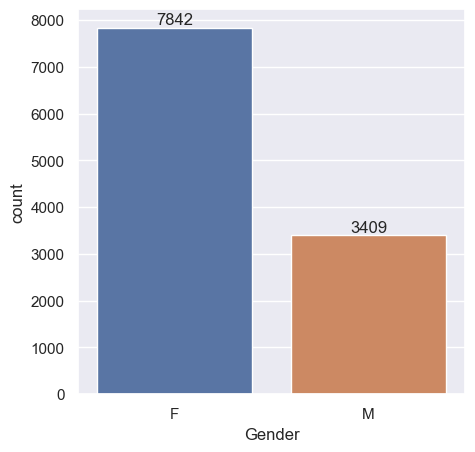

In [259]:
gender_axis = sns.countplot(x='Gender',data=df)
sns.set(rc = {'figure.figsize':(2,5)})
for genders in gender_axis.containers:
    gender_axis.bar_label(genders)

<Axes: xlabel='Gender', ylabel='Amount'>

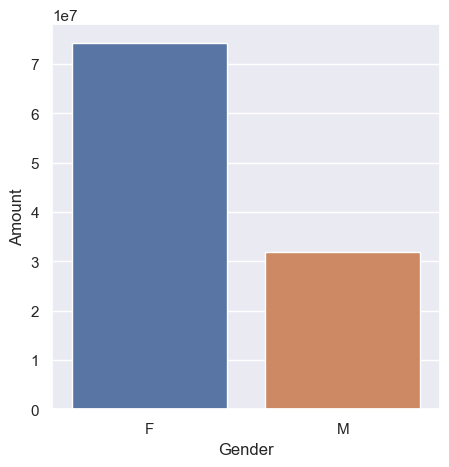

In [263]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='Gender',y='Amount', data=sales_gen)


##### *Insights --*
* Females customers purchase more than male customers

## <u> Age Group</u>

* #### Generalized

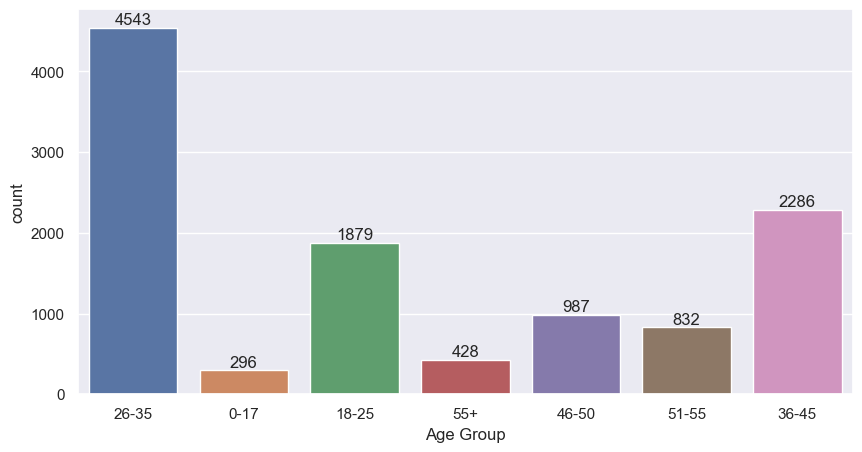

In [281]:
sales_count = sns.countplot(data=df, x='Age Group')
for count in sales_count.containers:
    sales_count.bar_label(count)

* #### Gender specific


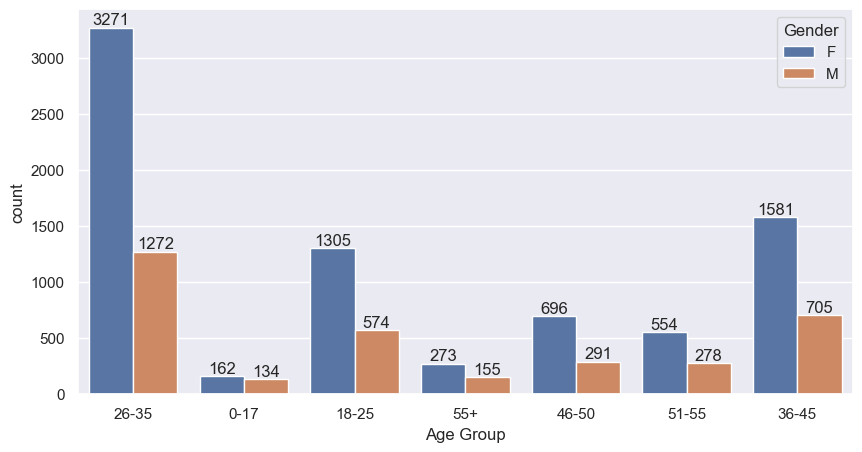

In [283]:
sales_count = sns.countplot(data=df, x='Age Group', hue='Gender')
for count in sales_count.containers:
    sales_count.bar_label(count)

* #### Amount spent

<Axes: xlabel='Age Group', ylabel='Amount'>

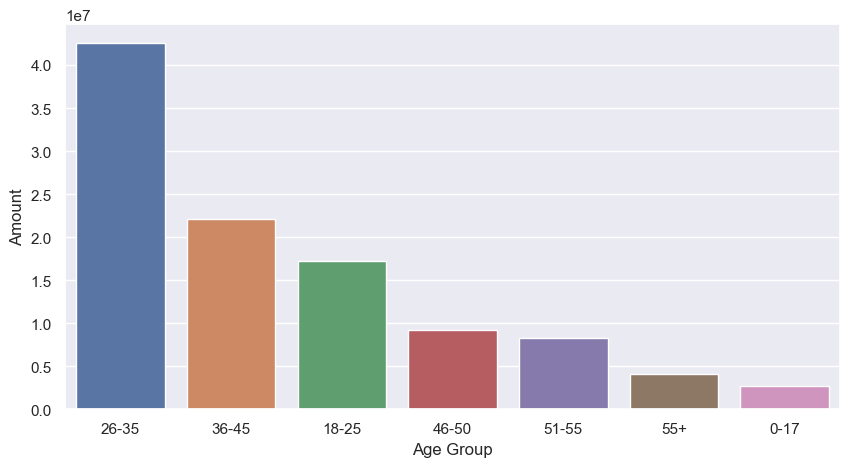

In [279]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x='Age Group',y='Amount', data=sales_age)


##### *Insights --*
* Females belgonging to the age group of 26 to 35 contributes maximum to the annual goods sale

## <u> State </u>

* #### Orders Recieved

<Axes: xlabel='State', ylabel='Orders'>

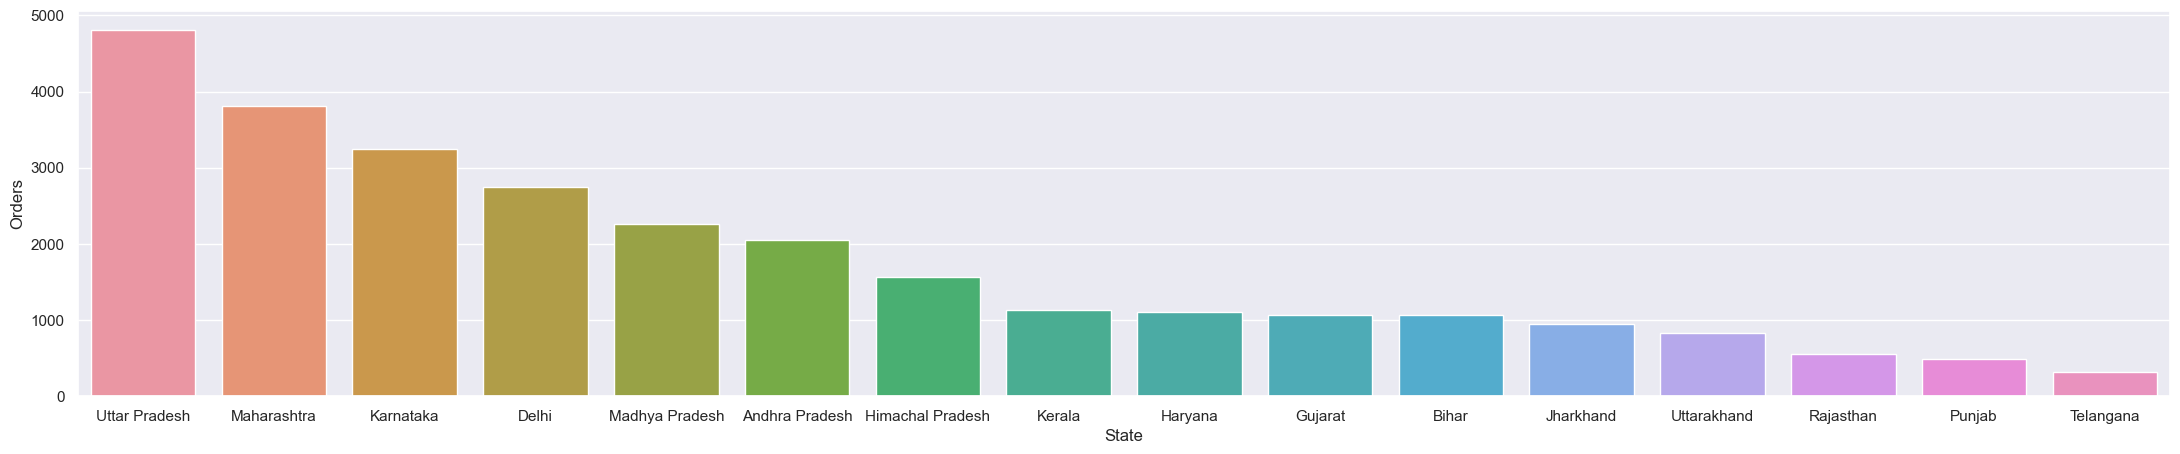

In [290]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.set(rc = {'figure.figsize':(27,5)})
sns.barplot(x='State',y='Orders', data=sales_state)

* #### Amount Spent

<Axes: xlabel='State', ylabel='Amount'>

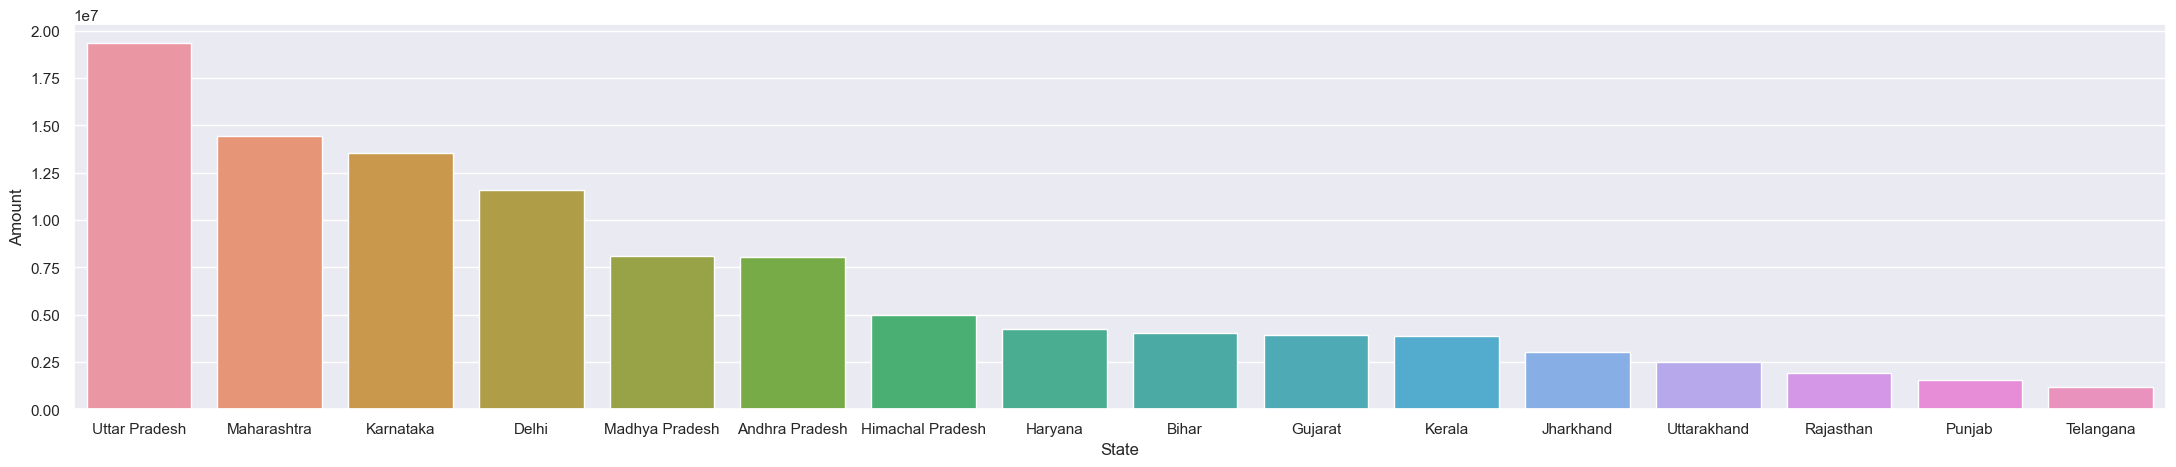

In [292]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc = {'figure.figsize':(27,5)})
sns.barplot(x='State',y='Amount', data=sales_state)

##### *Insights --*
* Uttar Pradesh is the state which generates the highest income & orders

## <u>Profession</u>

* #### Category purchased

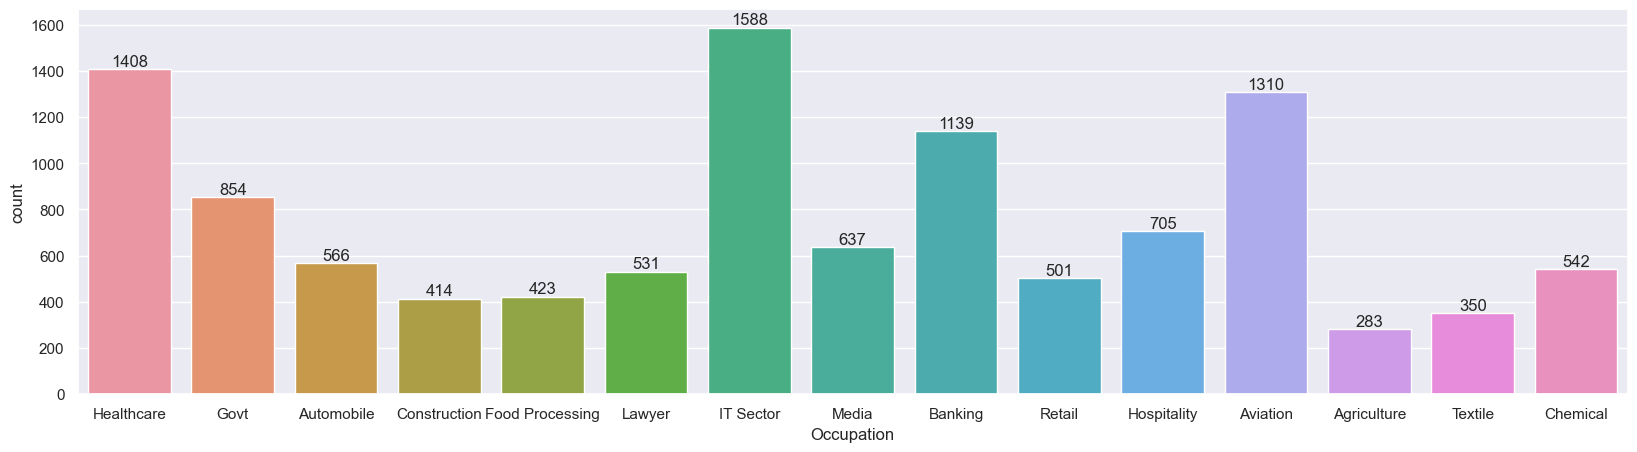

In [26]:
sns.set(rc = {'figure.figsize':(20,5)})
ax= sns.countplot(data= df, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

* #### Amount spent 

<Axes: xlabel='Occupation', ylabel='Amount'>

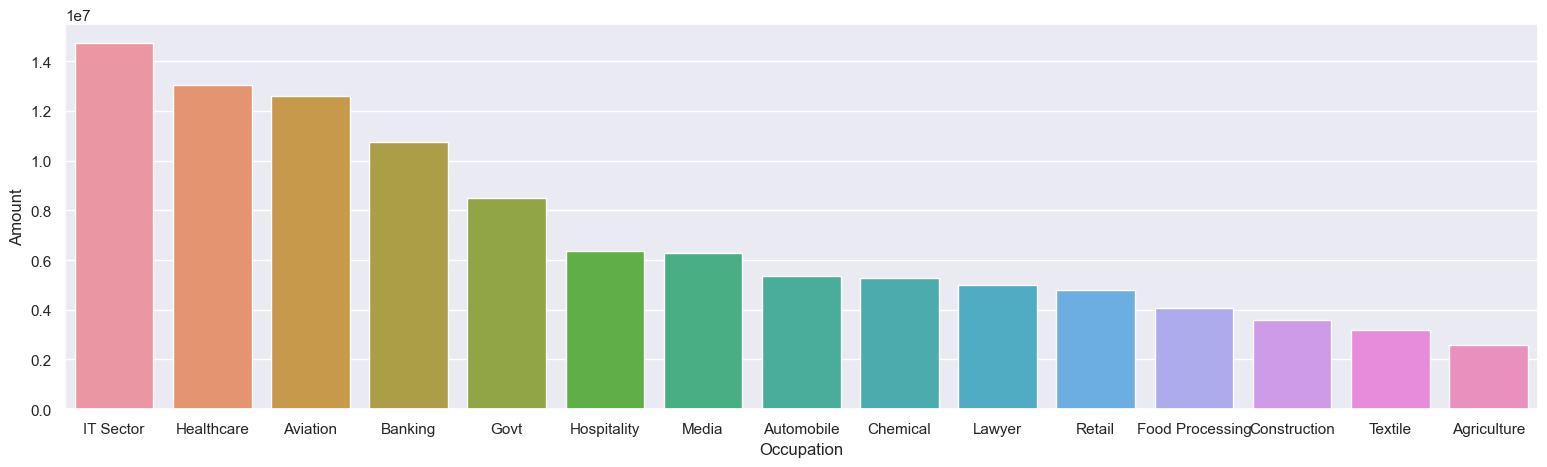

In [42]:
sales_profession = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc = {'figure.figsize':(19,5)})
sns.barplot(x='Occupation',y='Amount', data=sales_profession)

##### *Insights --*
 - The highest number of item is sold to people belonging from IT Sector
 * Highest revenue is genrated from buyers from IT Sector

## <u>Product Category</u>

* #### Total  product sold

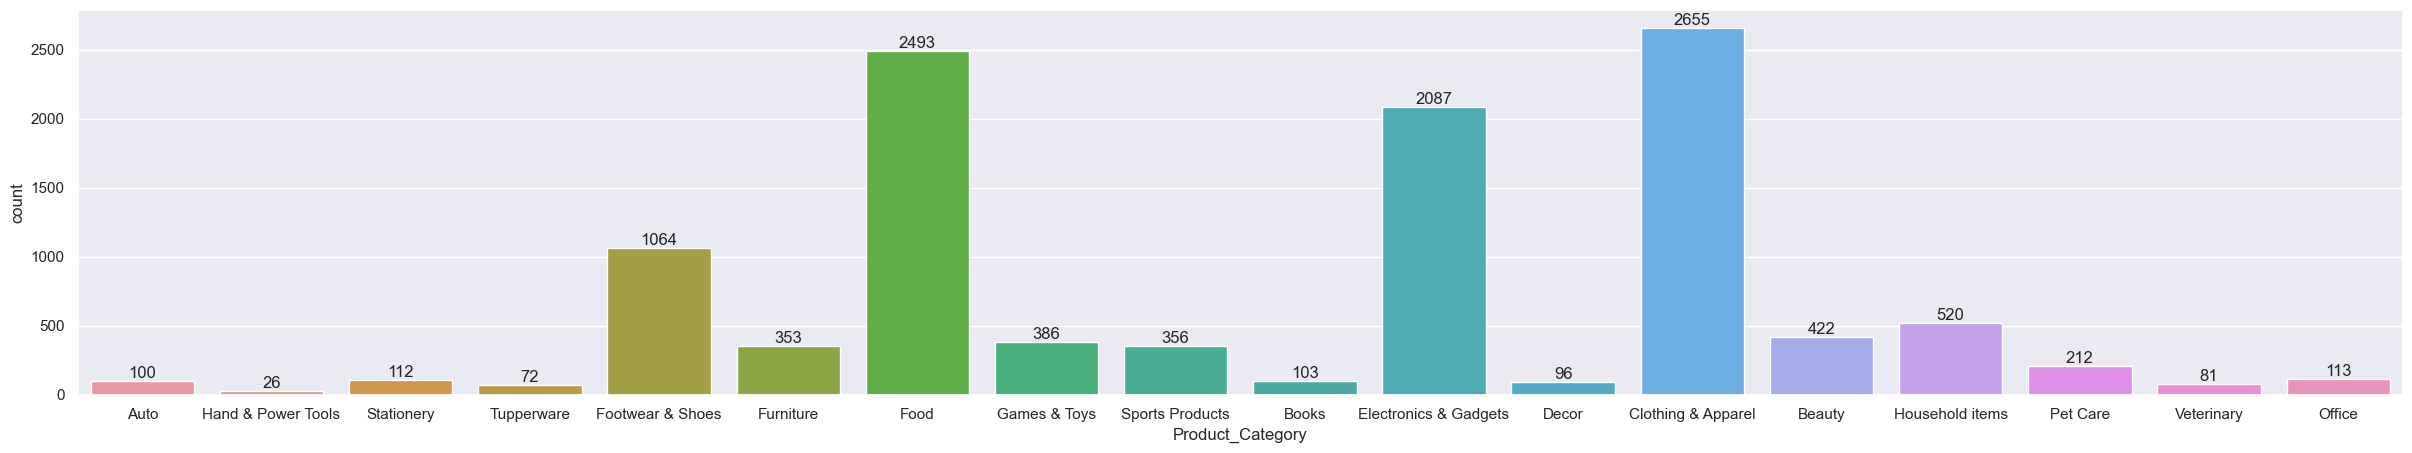

In [78]:
sns.set(rc = {'figure.figsize':(30,5)})
sales_product_category = sns.countplot(data= df, x= 'Product_Category')
for bars in sales_product_category.containers:
    sales_product_category.bar_label(bars)

* #### Top 5 purchased products

<Axes: xlabel='Product_Category', ylabel='Amount'>

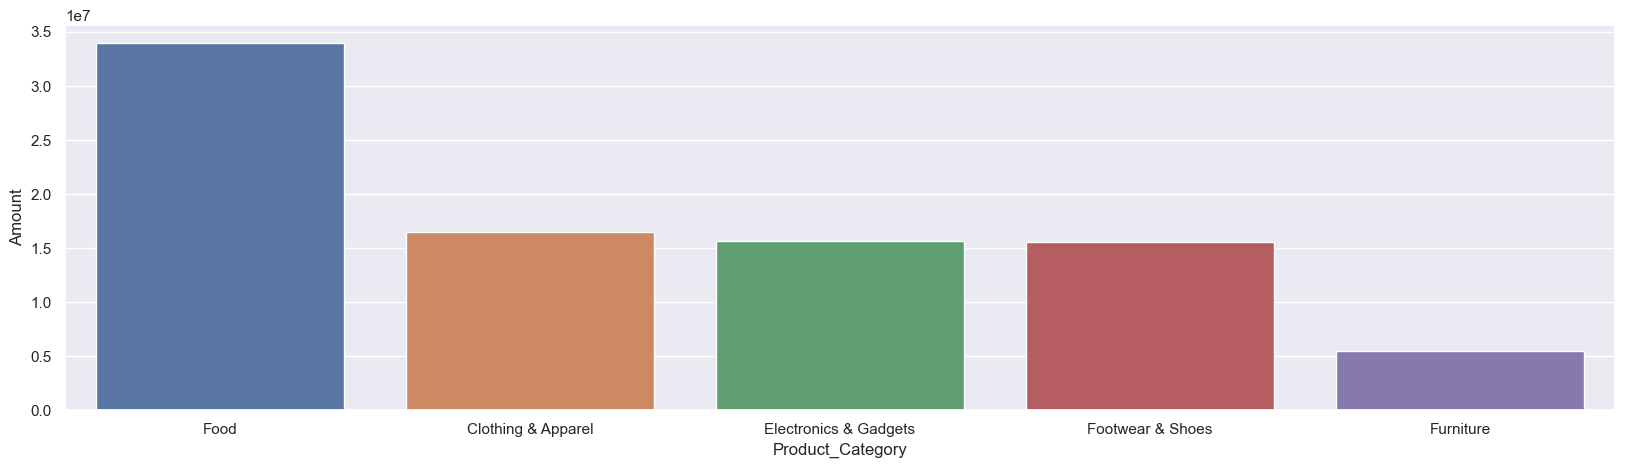

In [88]:
sales_product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount', data=sales_product_category)

##### *Insights --*
* Clothing & Apparel is the most sold item category
* Food generates the most of the revenue

## <u>Top 10  states with highest orders</u>

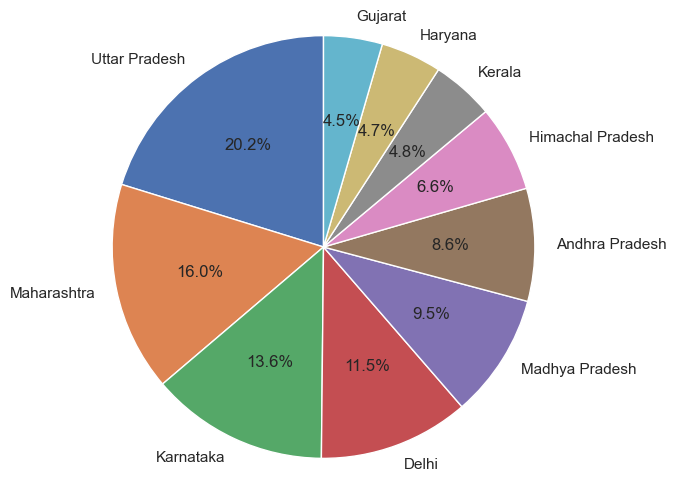

In [160]:
sales_states = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
#print(sales_state)
sns.set_style('whitegrid')
plt.figure(figsize= (6,6))
plt.pie(sales_states['Orders'], labels=sales_states['State'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

#### *<u>Conclusion :-</u>*
#### Company earns most its revenue from :
* Female customers
* people belonging to an age group of 26 - 35
* Outlets located in Uttar Pradesh
* people with an IT profession
* Top 4 product category i.e Food, Clothing & Apparel, Electronic & Gagdets, Footwear & Shoes
  